# **FORECAST ORDER DEMAND**

Ammar Khaq Baasir </br>
Linkedin : https://www.linkedin.com/in/ammar-baasir-973873234/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

from statsmodels.tsa.statespace.sarimax import SARIMAX
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!cp /content/gdrive/MyDrive/datasets/Sales/Historical_Product_Demand.csv /content

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/Historical_Product_Demand.csv')

In [ ]:
df.head(10)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
5,Product_0979,Whse_J,Category_028,2012/4/19,500
6,Product_0979,Whse_J,Category_028,2012/6/5,500
7,Product_0979,Whse_J,Category_028,2012/6/27,500
8,Product_0979,Whse_J,Category_028,2012/7/23,500
9,Product_0979,Whse_J,Category_028,2012/8/29,500


In [ ]:
df.shape

(1048575, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1048575 non-null  object        
 1   Warehouse         1048575 non-null  object        
 2   Product_Category  1048575 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1048575 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 40.0+ MB


In [ ]:
df.head(10)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
5,Product_0979,Whse_J,Category_028,2012-04-19,500
6,Product_0979,Whse_J,Category_028,2012-06-05,500
7,Product_0979,Whse_J,Category_028,2012-06-27,500
8,Product_0979,Whse_J,Category_028,2012-07-23,500
9,Product_0979,Whse_J,Category_028,2012-08-29,500


In [ ]:
df['Order_Demand'] = df['Order_Demand'].str.replace('(', "")
df['Order_Demand'] = df['Order_Demand'].str.replace(')', "")

<ipython-input-10-7dd92ba956da>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Order_Demand'] = df['Order_Demand'].str.replace('(', "")
<ipython-input-10-7dd92ba956da>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Order_Demand'] = df['Order_Demand'].str.replace(')', "")


In [ ]:
df['Order_Demand'] = pd.to_numeric(df['Order_Demand'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1048575 non-null  object        
 1   Warehouse         1048575 non-null  object        
 2   Product_Category  1048575 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1048575 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 40.0+ MB


In [ ]:
print(df['Order_Demand'].isnull().sum(), "/", len(df['Order_Demand']))
print(df['Date'].isnull().sum(), "/", len(df['Date']))

0 / 1048575
11239 / 1048575


In [ ]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True)
df.sort_values('Date')[10:20]

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
75193,Product_0642,Whse_C,Category_019,2011-10-31,3
121820,Product_0202,Whse_A,Category_007,2011-11-04,100
121819,Product_0202,Whse_A,Category_007,2011-11-04,400
131028,Product_2143,Whse_S,Category_009,2011-11-18,25
131031,Product_0131,Whse_S,Category_021,2011-11-18,12
131032,Product_0288,Whse_S,Category_021,2011-11-18,50
44450,Product_0980,Whse_A,Category_028,2011-11-18,4000
131027,Product_2138,Whse_S,Category_009,2011-11-18,49
131026,Product_2137,Whse_S,Category_009,2011-11-18,25
44795,Product_0965,Whse_A,Category_006,2011-11-18,1


In [ ]:
print(df['Order_Demand'].isnull().sum(), "/", len(df['Order_Demand']))
print(df['Date'].isnull().sum(), "/", len(df['Date']))

0 / 1037336
0 / 1037336


In [ ]:
df['Date'].min(), df['Date'].max()

(Timestamp('2011-01-08 00:00:00'), Timestamp('2017-01-09 00:00:00'))

Karena terdapat missing value maka kita mulai dari January 2012 - Desember 2016

In [ ]:
df = df[(df['Date']>='2012-01-01') & (df['Date']<='2016-12-31')].sort_values('Date', ascending=True)

Melihat Distribusi Data untuk variabel target (Order_Demand)

<ipython-input-18-521405789b34>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Order_Demand'], fit=norm)


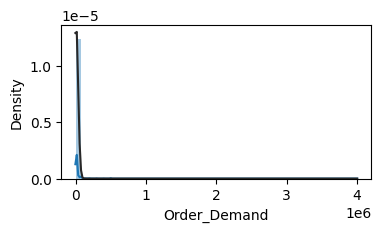

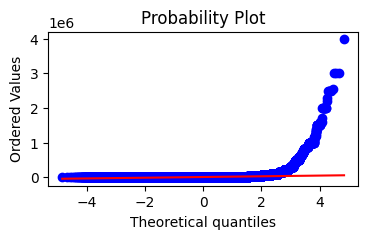

In [ ]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 4,2

sb.distplot(df['Order_Demand'], fit=norm)

#Get the QQ-plot
fig = plt.figure()
res = stats.probplot(df['Order_Demand'], plot=plt)
plt.show();

In [ ]:
df['Order_Demand'].skew()

31.506080242695006

In [ ]:
df['Warehouse'].value_counts().sort_values(ascending=False)

Whse_J    764215
Whse_A    142197
Whse_S     88024
Whse_C     42207
Name: Warehouse, dtype: int64

In [ ]:
df.groupby('Warehouse').sum().sort_values('Order_Demand', ascending=False)

<ipython-input-21-135603fb449c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Warehouse').sum().sort_values('Order_Demand', ascending=False)


,Order_Demand
Warehouse,
Whse_J,3362742530
Whse_S,1033121811
Whse_C,582004179
Whse_A,147646550


33


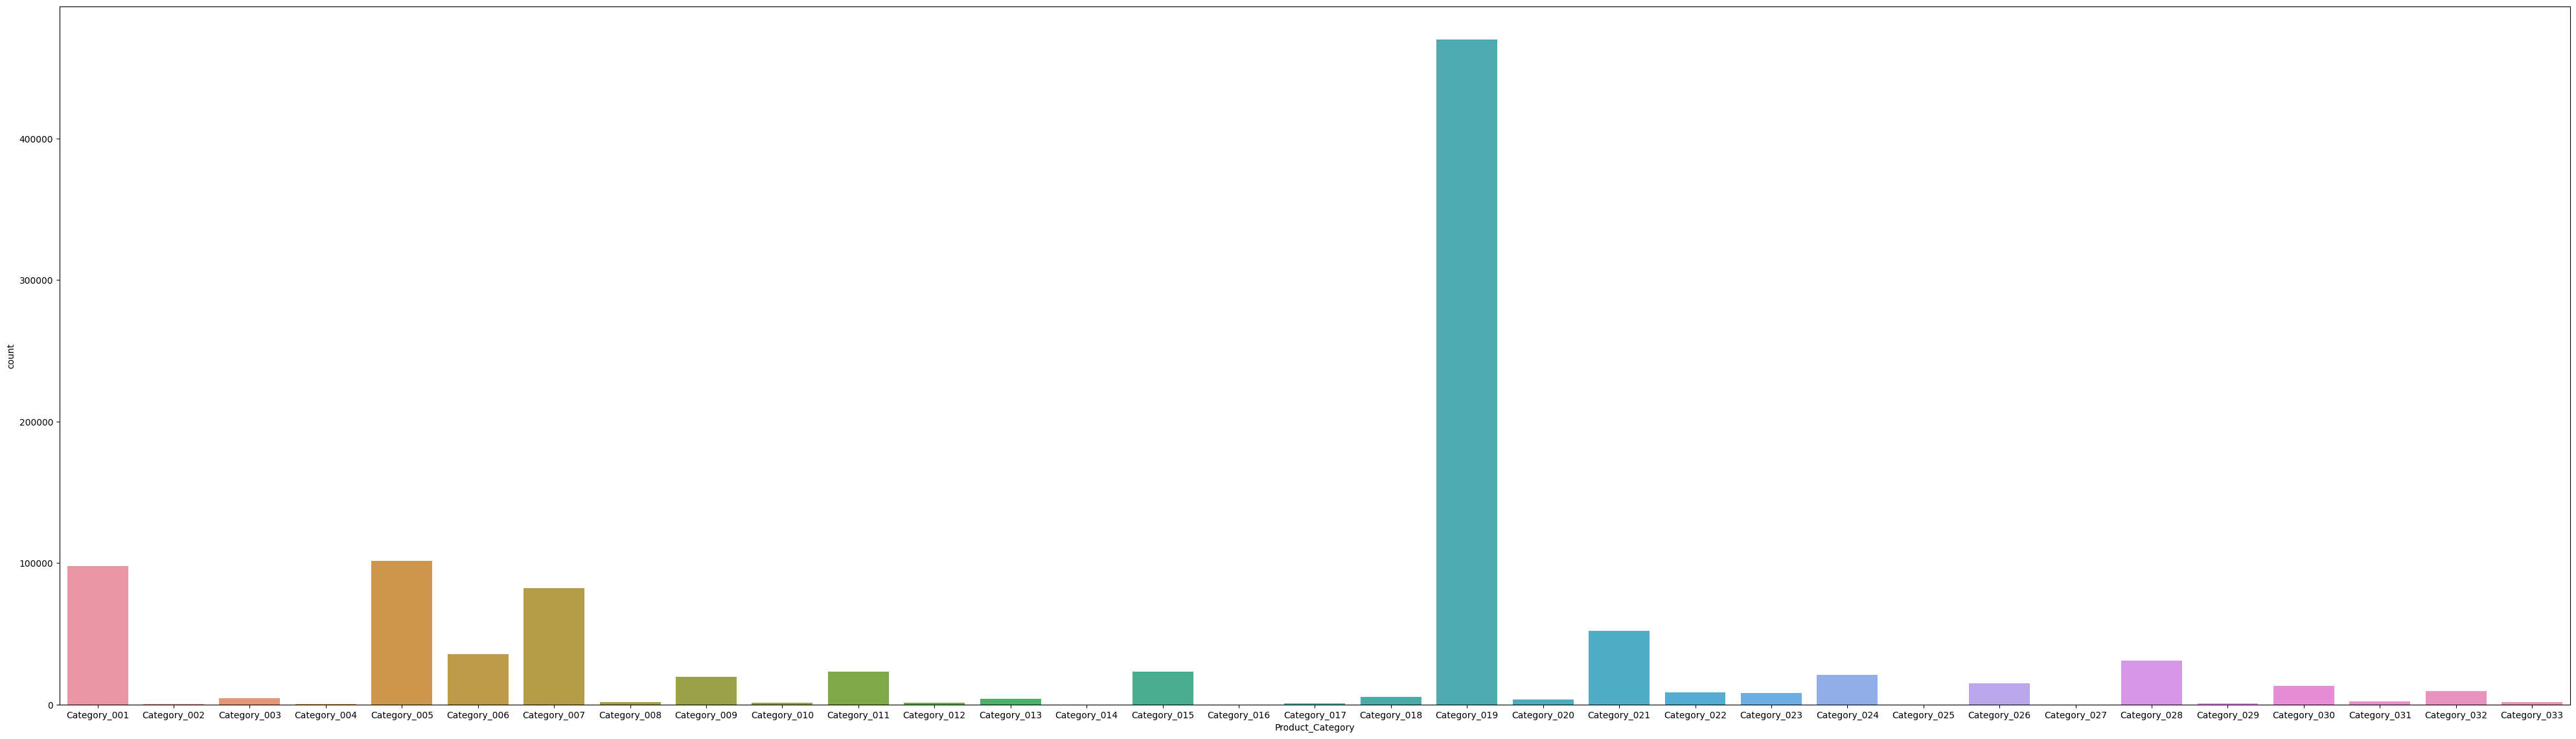

In [ ]:
print(len(df['Product_Category'].value_counts()))

rcParams['figure.figsize'] = 50,14
df['Product_Category'] = pd.Categorical(df['Product_Category'])
sb.countplot(data=df, x='Product_Category');

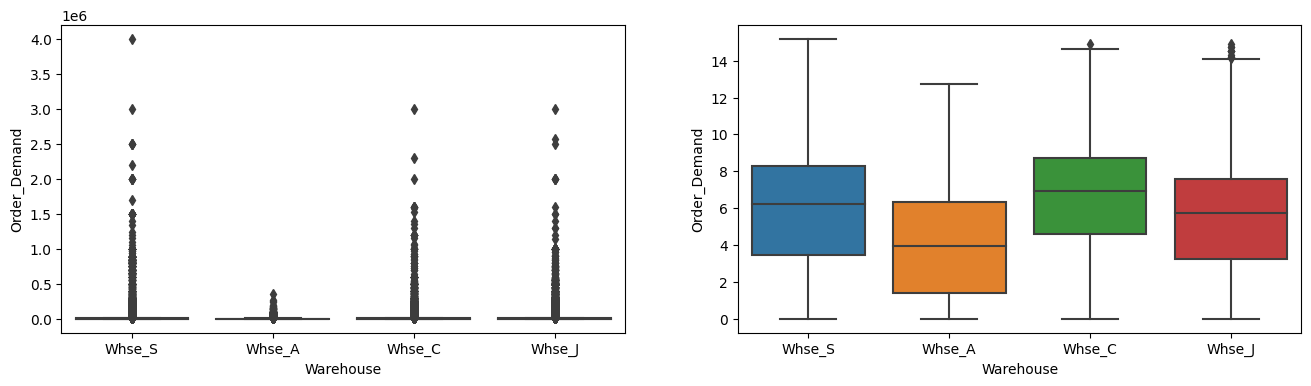

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 16,4
f, axes = plt.subplots(1,2)

fig1 = sb.boxplot(data=df, x='Warehouse', y='Order_Demand', ax = axes[0])
fig2 = sb.boxplot(data=df, x='Warehouse', y=np.log1p(df['Order_Demand']), ax = axes[1])

del fig1, fig2

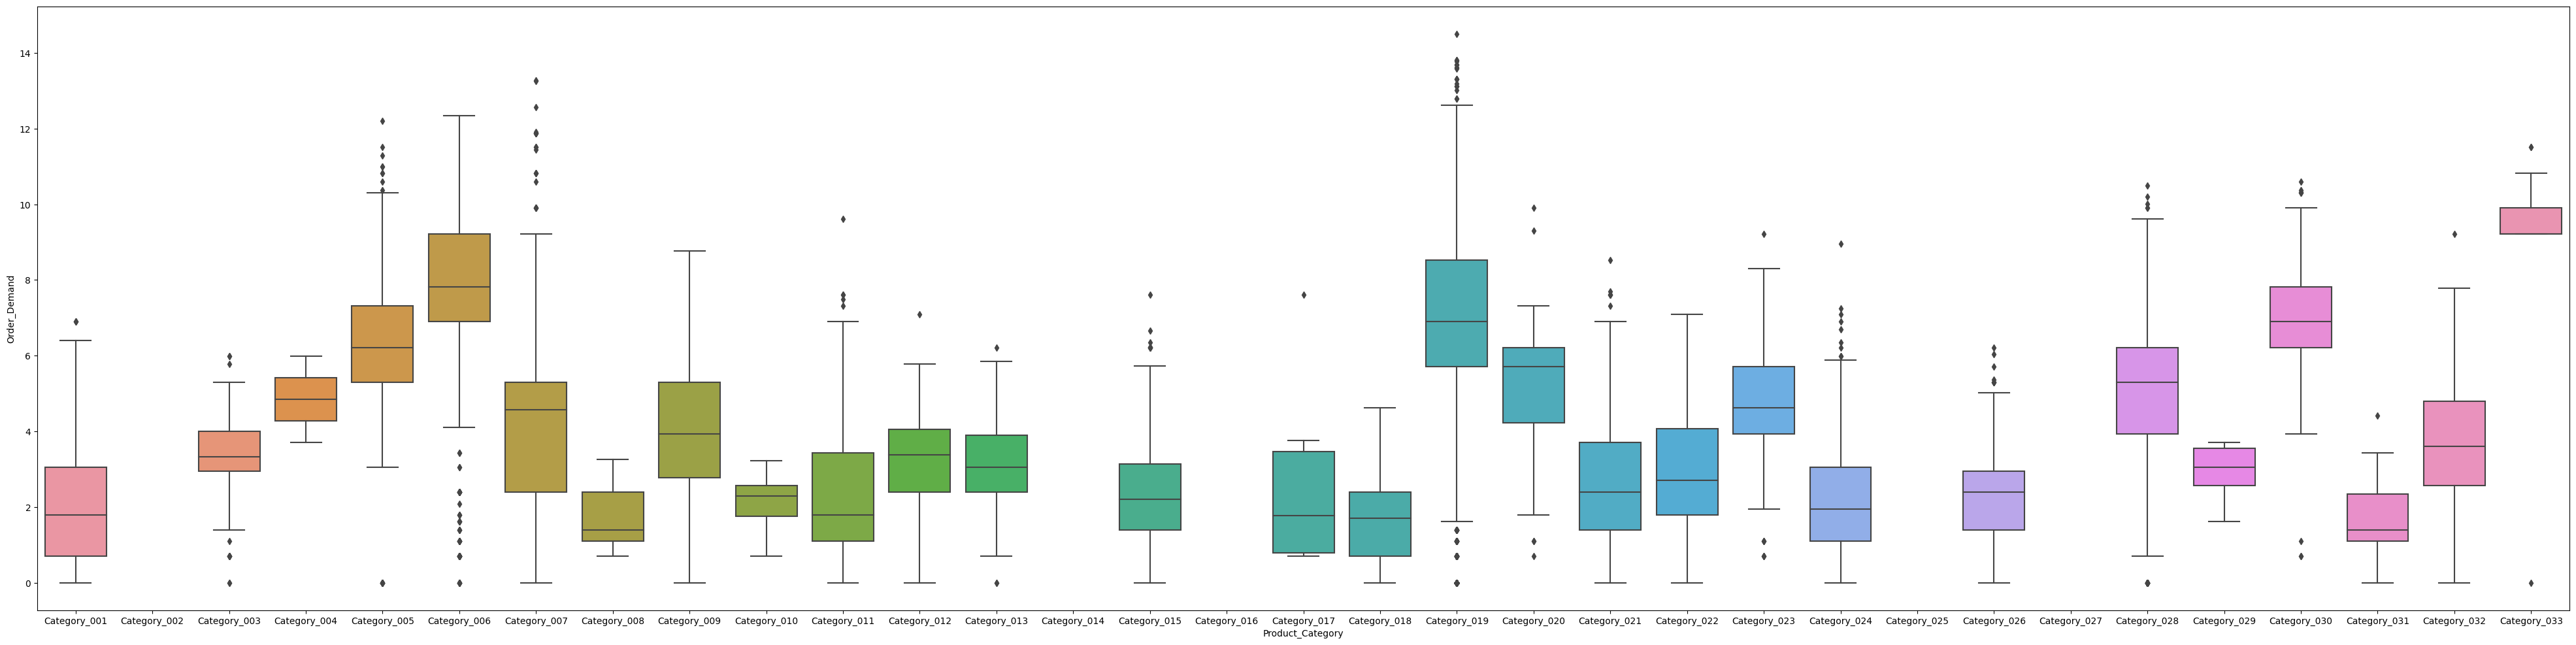

In [ ]:
rcParams['figure.figsize'] = 50,12

df_temp = df.sample(n=20000).reset_index()
fig5 = sb.boxplot(data=df_temp, x='Product_Category', y=np.log1p(df_temp['Order_Demand']))
del df_temp, fig5

EXPLORING THE DATA AS TIME SERIES

In [ ]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
130870,Product_2166,Whse_S,Category_024,2012-01-01,2
196928,Product_0614,Whse_S,Category_001,2012-01-02,3
200087,Product_1281,Whse_S,Category_019,2012-01-02,14000
200086,Product_1355,Whse_S,Category_019,2012-01-02,5000
77313,Product_2169,Whse_S,Category_024,2012-01-02,55


In [ ]:
df = df.groupby('Date')['Order_Demand'].sum().reset_index()

In [ ]:
df.head(10)

,Date,Order_Demand
0,2012-01-01,2
1,2012-01-02,680277
2,2012-01-03,1645257
3,2012-01-04,1295861
4,2012-01-05,8941774
5,2012-01-06,4390735
6,2012-01-08,987149
7,2012-01-09,1442691
8,2012-01-10,5038288
9,2012-01-11,3321775


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1681 non-null   datetime64[ns]
 1   Order_Demand  1681 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 26.4 KB


In [ ]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-08', '2012-01-09',
               '2012-01-10', '2012-01-11',
               ...
               '2016-12-20', '2016-12-21', '2016-12-22', '2016-12-23',
               '2016-12-25', '2016-12-26', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=1681, freq=None)

In [ ]:
y = df['Order_Demand'].resample('MS').mean()

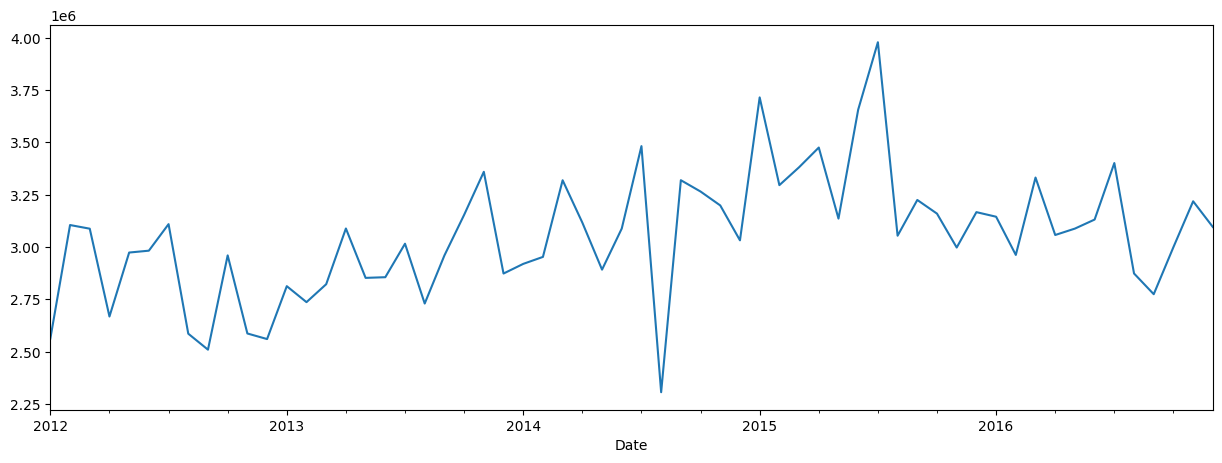

In [ ]:
y.plot(figsize=(15,5))
plt.show()

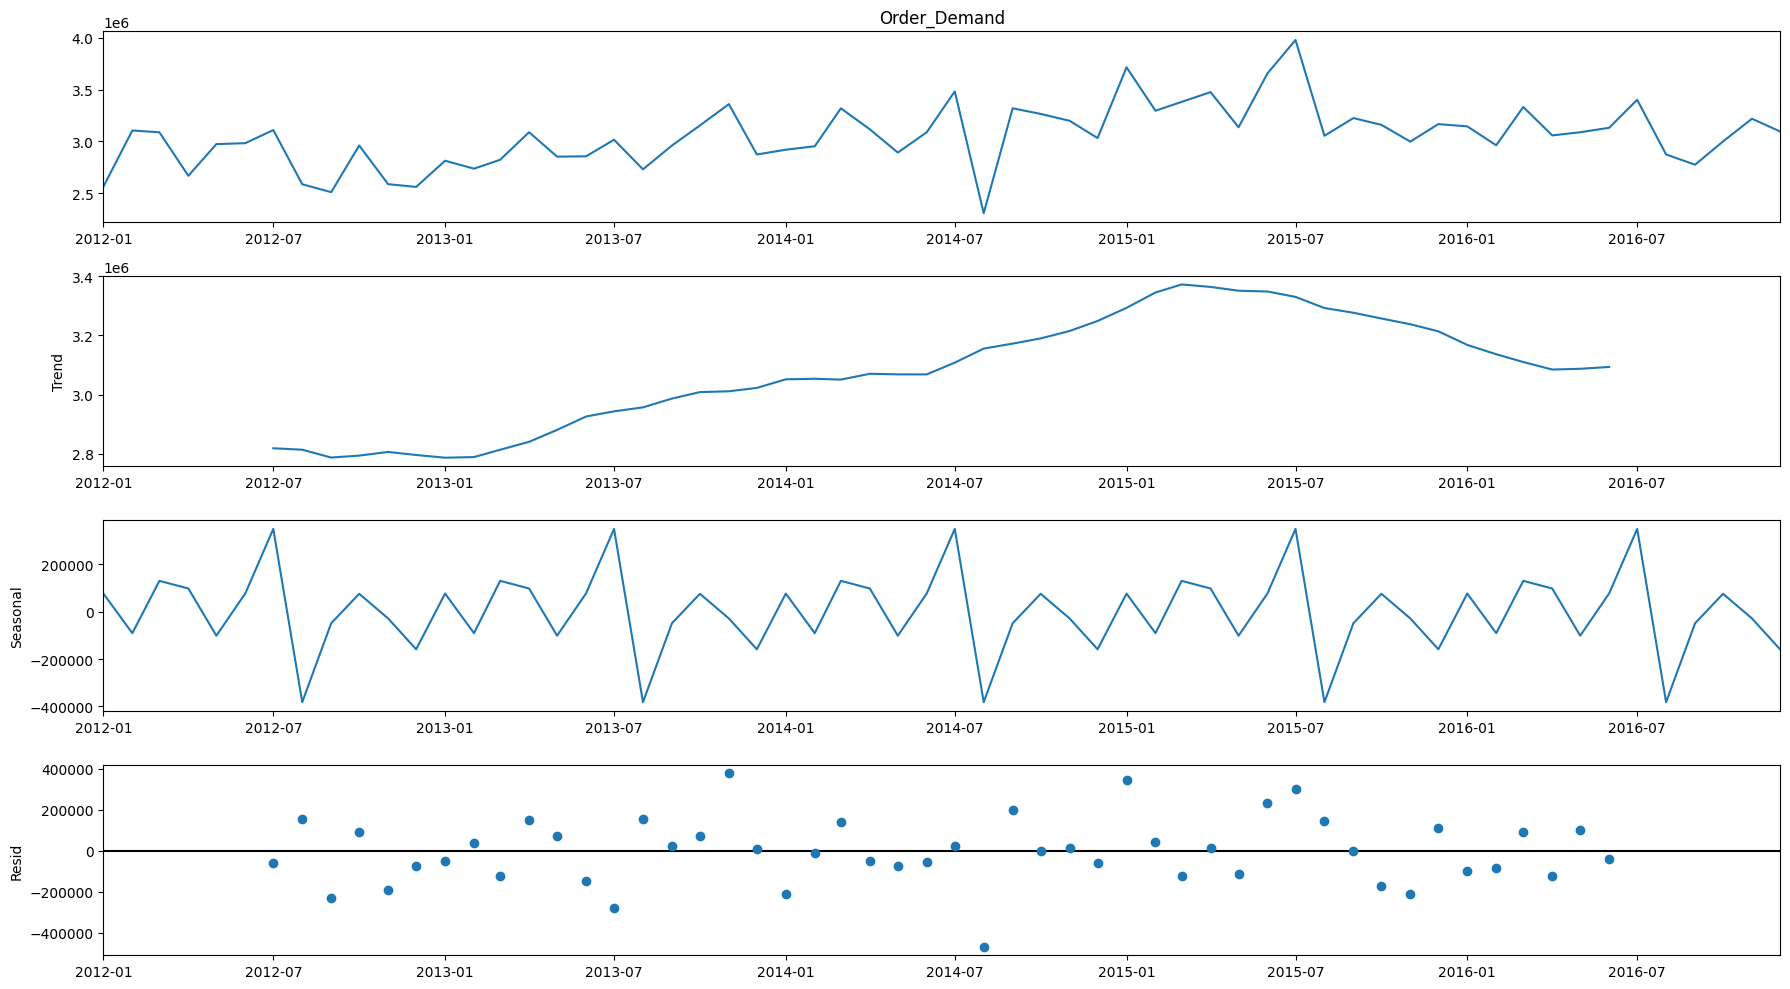

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18,10
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## **THEORY ON ARIMA**

Grid Search

In [ ]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Example of parameter combination for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Example of parameter combination for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq :
  for param_seasonal in seasonal_pdq :
    try :
      mod = sm.tsa.statespace.SARIMAX(y,
                                       order=param,
                                       seasonal_order=param_seasonal,
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)

      results = mod.fit()

      print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
    except:
      continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1932.23655778549
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1512.927583212436
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1338.8201294951011
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:3071.528024456278
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1366.5117513512635
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1340.8450308457734
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1023.6756022859483
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:3125.6813593306265
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1862.087487804522
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1471.1838032700705
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1305.3289813345489
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2988.5628301644883
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1529.1005721650909
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1467.6395590277812
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1020.6347629759124
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:3070.4334214018813
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1648.7378898187837
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AI

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8052      0.125      6.426      0.000       0.560       1.051
ma.L1         -0.5137      0.247     -2.078      0.038      -0.998      -0.029
ar.S.L12      -0.3226      0.140     -2.304      0.021      -0.597      -0.048
sigma2      9.366e+10   3.18e-13   2.95e+23      0.000    9.37e+10    9.37e+10


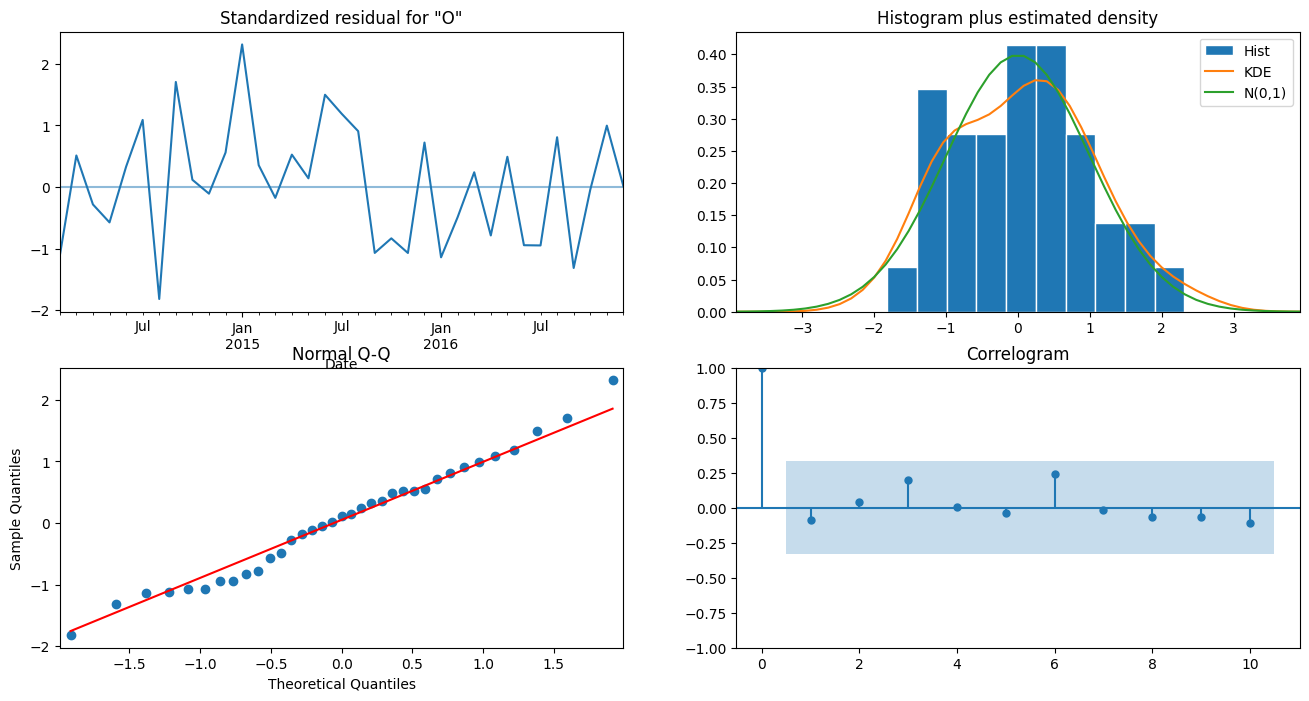

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

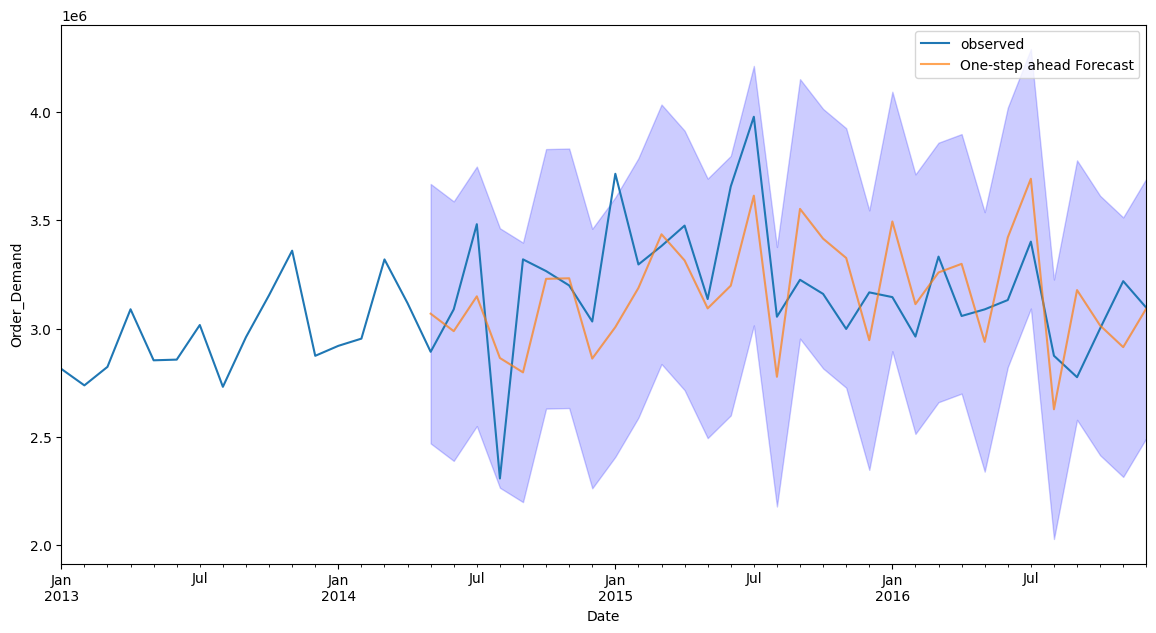

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2014-05-01'), dynamic=False) #false is when using the entire history.
#Confidence interval.
pred_ci = pred.conf_int()

#Plotting real and forecasted values.
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2016-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

MSE 59640315739.4


In [ ]:
print('RMSE: {}'.format(round(np.sqrt(mse), 2)))

RMSE: 267928.63


CATATAN : </BR>
1. Data dan model perlu di evaluasi karena hasil prediksi masih tidak bagus dan nilai dari RMSE dan MSE masih tergolong tinggi.
2. Hasil prediksi belum bagus karena data perlu dilakukan Uji ADF dan KPSS untuk mengetahui apakah data stationer atau tidak.
3. Dari hasil nilai skew menghasilkan nilai 31 artinya data tidak terdistribusi dengan normal.
4. Dari hasil test nilai skew menunjukkan angka 31 ini artinya data terdistribusi positif (data bersifat miring ke kanan).
5. Data harus ditransformasikan karena data skewness (tidak simetris). Untuk mentranformasikan data dapat menggunakan teknik differencing.